In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mysql.connector as cnt

In [2]:
dus18 = '../../DATA/DUS2018.csv'
df18 = pd.read_csv(dus18)
df18

,svoris,stazas,darbo_laiko_dalis,evrk,im_dydzio_kodas,im_dydis,amzius,atostogu_dienos,sutarties_rusis,virsvalandziu_bdu,...,sutartis,apmoketos_val,bdu_val,nuts,virsvalandziu_sk,premijos,bdu_spalio,priemokos,objectid,issilavinimas
0,25.57,0,100,XC,0,1_49,40-49,20,A,0,...,N,183,2.51,LT,0,146,460,0,1,G2
1,25.05,13,100,XC,0,1_49,50-59,26,A,0,...,N,183,8.13,LT,0,132,1487,0,2,G2
2,25.44,13,100,XC,0,1_49,40-49,26,A,0,...,N,183,8.20,LT,0,132,1500,0,3,G2
3,24.91,13,100,XC,0,1_49,50-59,26,A,0,...,N,183,8.20,LT,0,132,1500,0,4,G2
4,24.51,18,100,XM,1,50_249,40-49,24,A,0,...,N,183,2.19,LT,0,0,400,0,5,G2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43159,10.64,9,100,XR,1,50_249,30-39,20,A,0,...,D,183,19.79,LT,0,0,3621,0,43160,G4
43160,10.79,3,100,XK,0,1_49,30-39,20,A,0,...,N,184,2.18,LT,0,0,402,0,43161,G2
43161,10.74,1,100,XK,0,1_49,40-49,20,A,0,...,N,183,2.45,LT,0,0,448,0,43162,G2
43162,10.86,9,100,XK,0,1_49,30-39,20,A,0,...,N,184,2.51,LT,0,0,462,0,43163,G3


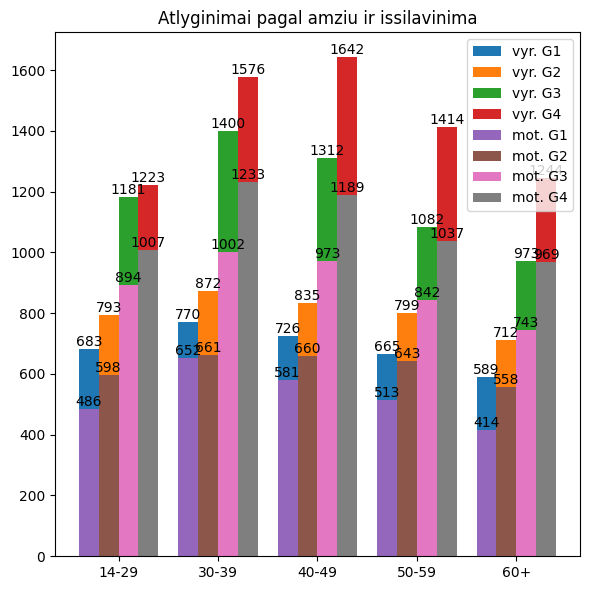

In [26]:
df = df18[['lytis', 'issilavinimas', 'amzius', 'bdu_spalio']]

edu = df['issilavinimas'].value_counts().index.sort_values()
amzius = df['amzius'].value_counts().index.sort_values()
lytis = df['lytis'].value_counts().index.sort_values()

atlmg1 = []
atlmg2 = []
atlmg3 = []
atlmg4 = []

atlfg1 = []
atlfg2 = []
atlfg3 = []
atlfg4 = []

for amz in amzius:
    atl = df[(df['issilavinimas'] == 'G1') & (df['amzius'] == amz ) & (df['lytis'] == 'M')]['bdu_spalio'].mean()
    atlmg1.append(round(atl))

for amz in amzius:
    atl = df[(df['issilavinimas'] == 'G2') & (df['amzius'] == amz ) & (df['lytis'] == 'M')]['bdu_spalio'].mean()
    atlmg2.append(round(atl))
    
for amz in amzius:
    atl = df[(df['issilavinimas'] == 'G3') & (df['amzius'] == amz ) & (df['lytis'] == 'M')]['bdu_spalio'].mean()
    atlmg3.append(round(atl))
    
for amz in amzius:
    atl = df[(df['issilavinimas'] == 'G4') & (df['amzius'] == amz ) & (df['lytis'] == 'M')]['bdu_spalio'].mean()
    atlmg4.append(round(atl))
    

for amz in amzius:
    atl = df[(df['issilavinimas'] == 'G1') & (df['amzius'] == amz ) & (df['lytis'] == 'F')]['bdu_spalio'].mean()
    atlfg1.append(round(atl))
for amz in amzius:
    atl = df[(df['issilavinimas'] == 'G2') & (df['amzius'] == amz ) & (df['lytis'] == 'F')]['bdu_spalio'].mean()
    atlfg2.append(round(atl))
    
for amz in amzius:
    atl = df[(df['issilavinimas'] == 'G3') & (df['amzius'] == amz ) & (df['lytis'] == 'F')]['bdu_spalio'].mean()
    atlfg3.append(round(atl))
    
for amz in amzius:
    atl = df[(df['issilavinimas'] == 'G4') & (df['amzius'] == amz ) & (df['lytis'] == 'F')]['bdu_spalio'].mean()
    atlfg4.append(round(atl))

# print(atlmg1)


# for a in amzius:
#     for e in edu:
#         for l in lytis:
#             atl = df[(df['issilavinimas'] == e) & (df['amzius'] == a ) & (df['lytis'] == l)]['bdu_spalio'].mean()
#             print(f'{a:6} | {e:3} | {l} | {atl:.2f}')

a = np.arange(1,6)
w = 0.2
fig, axis = plt.subplots(figsize=(6, 6))

M1 = axis.bar(a-w*1.5, atlmg1, width=w, label='vyr. G1')
axis.bar_label(M1)

M2 = axis.bar(a-w*0.5, atlmg2, width=w, label='vyr. G2')
axis.bar_label(M2)

M3 = axis.bar(a+w*0.5, atlmg3, width=w, label='vyr. G3')
axis.bar_label(M3)

M4 = axis.bar(a+w*1.5, atlmg4, width=w, label='vyr. G4')
axis.bar_label(M4)


F1 = axis.bar(a-w*1.5, atlfg1, width=w, label='mot. G1')
axis.bar_label(F1)

F2 = axis.bar(a-w*0.5, atlfg2, width=w, label='mot. G2')
axis.bar_label(F2)

F3 = axis.bar(a+w*0.5, atlfg3, width=w, label='mot. G3')
axis.bar_label(F3)

F4 = axis.bar(a+w*1.5, atlfg4, width=w, label='mot. G4')
axis.bar_label(F4)

axis.set_xticks(a)
axis.set_xticklabels(amzius)
plt.title('Atlyginimai pagal amziu ir issilavinima')
fig.tight_layout()
axis.legend()
plt.show()